<a href="https://colab.research.google.com/github/pedrohcmds/bootcamp-alura-projeto-mortalidade/blob/main/Projeto_M%C3%B3dulo_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análise de Dados de Mortalidade de doenças

Estudando os dados da saúde no Bootcamp de ciência de dados da Alura, me deparei com um conjunto de dados que é tanto interessante quanto perturbador.

Refefre-se ao número de pessoas por mortes evitáveis. Isso me chamou a atenção, pois de pronto me surgiram diversas dúvidas:

- O que são doenças evitáveis?
- Porque as pessoas ainda morrem de doenças evitáveis? 

Então, esse estudo objetiva entender melhor esssas e outras questões sobre óbitos por doenças evitáveis a partir da análise dos dados do DataSUS.

### Importando Bibliotecas

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# 1- Importando os Dados

In [2]:
arquivo_dados_mortes = 'https://raw.githubusercontent.com/pedrohcmds/bootcamp-alura-projeto-mortalidade/main/dados/mortes_evitaveis_por_ano_por_estado.csv'

In [3]:
dados_mortes = pd.read_csv(arquivo_dados_mortes,  sep=';', encoding='ISO-8859-1', skiprows=3, skipfooter=9, thousands='.', decimal=',', engine='python')

# 2 - Analise Exploratória e limpeza de dados

In [4]:
dados_mortes.head()

,Unidade da Federação,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,Total
0,11 Rondônia,3118,3154,3618,3548,3762,4142,4162,4324,4305,4132,4073,3754,4215,4618,4839,4697,5103,4865,4959,4976,5342,5187,5047,5164,105104
1,12 Acre,1267,1300,1329,1242,1427,1425,1495,1489,1526,1549,1592,1653,1691,1722,1841,1903,2023,2023,2034,2075,2260,2372,2525,2456,42219
2,13 Amazonas,4601,4650,4948,5299,5949,6019,6158,6182,6452,6639,6818,7091,7785,7855,8284,8803,9086,9189,9766,10226,10354,10593,10870,11336,184953
3,14 Roraima,613,588,700,834,889,782,869,888,911,925,942,986,954,1001,1125,1065,1123,1275,1235,1376,1363,1596,1797,1799,25636
4,15 Pará,10012,11041,11961,12415,12593,14049,14137,15218,15594,16092,16573,17121,18685,19062,20359,20501,21229,21429,22158,23168,24050,24615,24970,24690,431722


In [5]:
# Verificação de dados nulos
dados_mortes.isna().values.any()

False

In [6]:
# Verificação de tamnho dos dados

dados_mortes.shape

(28, 26)

In [7]:
# Ordenando os dados por total de óbitos
dados_mortes.sort_values('Total', inplace=True, ascending=False)

In [8]:
# Retirando total das colunas

dados_mortes_sem_total = dados_mortes.drop(axis='columns', columns='Total')

In [9]:
# Colocando as unidades da federação como index do DataFrame
dados_mortes_sem_total.drop(axis='columns', columns='Unidade da Federação', inplace = True)
dados_mortes_sem_total = dados_mortes_sem_total.set_index(dados_mortes['Unidade da Federação'], drop=True)

In [10]:
# Retirando total das linhas
dados_mortes_sem_total.drop('Total', inplace=True, axis='index',)

In [11]:
# Mostrando o dataframe limpo
dados_mortes_sem_total.head()

,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
Unidade da Federação,,,,,,,,,,,,,,,,,,,,,,,,
35 São Paulo,155419,152166,151097,154449,155131,153187,151511,151440,150999,145536,147455,146545,148646,151301,153948,155199,154773,157635,157751,160062,164608,161409,163859,165989
33 Rio de Janeiro,77080,74209,75104,73635,71948,72966,73882,72838,73037,70672,72008,72835,73728,73905,74355,74329,72692,74693,74482,74697,79500,77532,79752,81334
31 Minas Gerais,60408,60891,61021,62580,59951,60991,60800,64602,66305,65367,68001,67636,68012,68948,71258,72227,72739,72540,73102,73442,76464,75928,74469,76125
43 Rio Grande do Sul,42373,41087,43033,42178,42218,42406,42571,42909,43699,42559,42995,44152,43479,44758,44727,45131,45279,46530,45704,45380,48056,47145,47448,47321
29 Bahia,30739,30025,31934,33212,34157,35240,36407,36696,37358,37508,39079,39798,42357,44206,45491,46262,47769,47942,49105,50116,51648,52576,52033,52701


### Plotando Gráficos

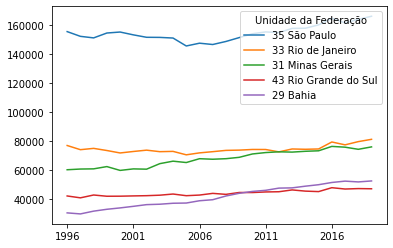

In [12]:
# Plotando alguns gráficos
dados_mortes_sem_total.head().T.plot()

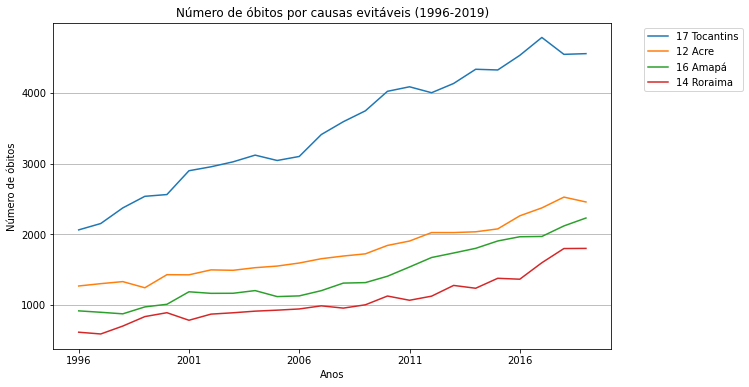

In [13]:
# Melhorando os Gráficos
ax = dados_mortes_sem_total.tail(4).T.plot(figsize=(10,6))
plt.title('Número de óbitos por causas evitáveis (1996-2019)')
plt.ylabel('Número de óbitos')
plt.xlabel('Anos')
plt.grid(axis='y')
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

In [14]:
# Tirando a média por estado
medias_por_estado = round(dados_mortes_sem_total.T.mean(),2)
medias_por_estado.head(2)

Unidade da Federação
35 São Paulo         154588.12
33 Rio de Janeiro     74633.88
dtype: float64

In [15]:
# Tirando a média de todos os estados
media_geral_por_estado = medias_por_estado.mean()
media_geral_por_estado
media_por_estado_por_mes = media_geral_por_estado/12
print(f' Média geral por por estado: {media_geral_por_estado}\n Média geral por mês: {media_por_estado_por_mes}')

 Média geral por por estado: 24175.09444444445
 Média geral por mês: 2014.5912037037042


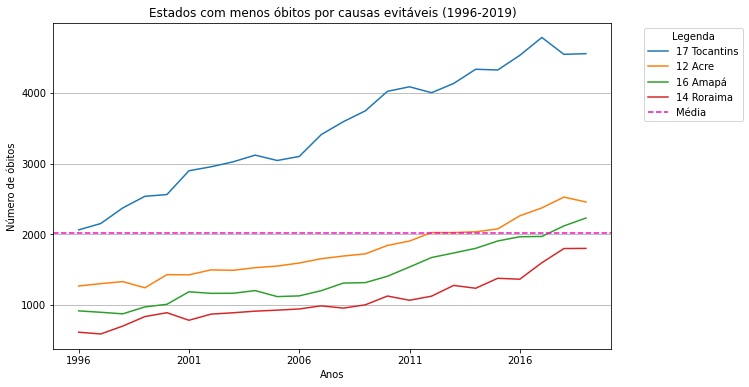

In [16]:
# Criando um gráfico com os estados com o menor número de mortes e a média
ax = dados_mortes_sem_total.tail(4).T.plot(figsize=(10,6))
plt.title('Estados com menos óbitos por causas evitáveis (1996-2019)')
plt.ylabel('Número de óbitos')
plt.xlabel('Anos')
plt.axhline(y=media_por_estado_por_mes, linestyle='--', color='#E916BF', label='Média')
plt.grid(axis='y')
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title='Legenda')
plt.show()

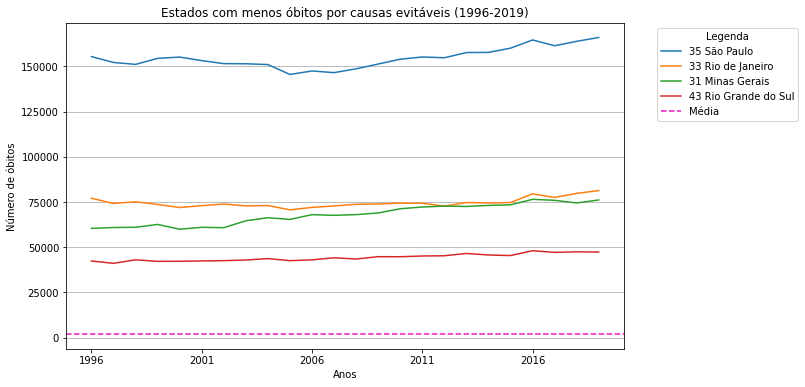

In [17]:
# Criando um gráfico com os estados com o maior número de mortes e a média
ax = dados_mortes_sem_total.head(4).T.plot(figsize=(10,6))
plt.title('Estados com menos óbitos por causas evitáveis (1996-2019)')
plt.ylabel('Número de óbitos')
plt.xlabel('Anos')
plt.axhline(y=media_por_estado_por_mes, linestyle='--', color='#E916BF', label='Média')
plt.grid(axis='y')
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title='Legenda')
plt.show()

Agora vamos criar um gráfico com o estado com o e menor e maior número de óbitos totais

In [18]:
maior_e_menor = pd.DataFrame()
maior_e_menor = maior_e_menor.append(dados_mortes_sem_total.head(1))
maior_e_menor = maior_e_menor.append(dados_mortes_sem_total.tail(1))
maior_e_menor

,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
Unidade da Federação,,,,,,,,,,,,,,,,,,,,,,,,
35 São Paulo,155419,152166,151097,154449,155131,153187,151511,151440,150999,145536,147455,146545,148646,151301,153948,155199,154773,157635,157751,160062,164608,161409,163859,165989
14 Roraima,613,588,700,834,889,782,869,888,911,925,942,986,954,1001,1125,1065,1123,1275,1235,1376,1363,1596,1797,1799


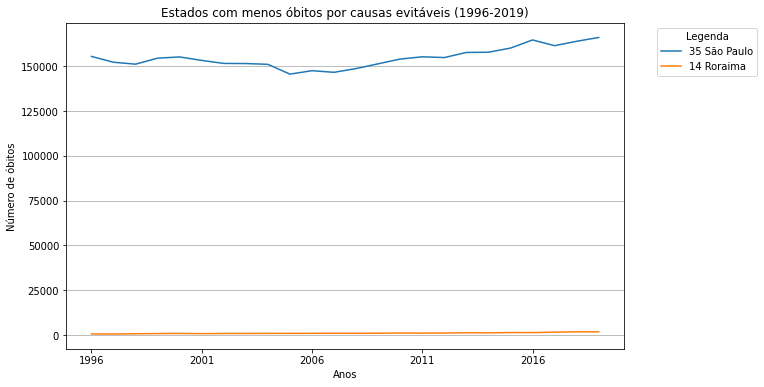

In [19]:
# Criando um gráfico com os estados com o maior número de mortes e a média
ax = maior_e_menor.T.plot(figsize=(10,6))
plt.title('Estados com menos óbitos por causas evitáveis (1996-2019)')
plt.ylabel('Número de óbitos')
plt.xlabel('Anos')
#plt.axhline(y=media_por_estado_por_mes, linestyle='--', color='#E916BF', label='Média')
plt.grid(axis='y')
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title='Legenda')
plt.show()

Esses dados são interessantes, e as visualizações também. Porém me pergunto o quanto desses números não é afetado pela população de cada estado.
Para verificar essa possibilidade, vamos trazer os dados de população estimada e realizar novamente os gráficos, mas agora ocom o número de óbitos em relação à população.
A base de dados que será utilizada para isso é a de estimativa de população do IBGE, disponível em https://www.ibge.gov.br/estatisticas/sociais/populacao/9103-estimativas-de-populacao.html?=&t=resultados.

In [25]:
 colunas = dados_mortes_sem_total.columns[15:]
 dados_morte_sem_total_2011_2019 = dados_mortes_sem_total[colunas]
 dados_morte_sem_total_2011_2019

,2011,2012,2013,2014,2015,2016,2017,2018,2019
Unidade da Federação,,,,,,,,,
35 São Paulo,155199,154773,157635,157751,160062,164608,161409,163859,165989
33 Rio de Janeiro,74329,72692,74693,74482,74697,79500,77532,79752,81334
31 Minas Gerais,72227,72739,72540,73102,73442,76464,75928,74469,76125
43 Rio Grande do Sul,45131,45279,46530,45704,45380,48056,47145,47448,47321
29 Bahia,46262,47769,47942,49105,50116,51648,52576,52033,52701
41 Paraná,41654,41645,41528,40457,41389,43182,40922,41730,41857
26 Pernambuco,33612,33326,33660,33344,35528,37974,37260,35659,36037
23 Ceará,25812,27504,28778,28903,29716,29030,31676,30902,29351
42 Santa Catarina,21657,21548,21414,21906,21996,23334,23018,23442,24023
